In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import glob
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install syllables
!pip install textstat
!pip install langdetect
import syllables
import textstat
import re

In [ ]:
# Load the dataset
df = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/2.General Dataset (Initial)/Project Description for NLP.csv')
print(df.head(20))
print("Shape: ", df.shape)

                                                blurb  state parent_category
0     A film about chance meetings and changed lives.      1    Film & Video
1   Milestone Broadcast is producing  www.peaceday...      1    Film & Video
2   Teaching kids computer science and robotics th...      1      Technology
3   Share everything in life's journey with your p...      1          Design
4   This book is dedicated to your inner child. It...      1      Publishing
5   First books for toddlers that inspire life lon...      1      Publishing
6   We are gamers and nerds with a desire to desig...      0          Crafts
7           Holidazed Christmas Record, Toddie Time 2      1           Other
8   A series of fun books for children to help the...      1      Publishing
9   "FIVE" follows the story of five out of thirte...      1          Comics
10  Help bring the CRYSTAL icons to your computer ...      0          Design
11  A feature-length comedy about video games... e...      1    Film & Video

In [ ]:
# Cleaning the Dataset
df['blurb'].isnull().sum()

0

### **Analysis:** There are no project without a Project Description.

### **Analysis:** There are some projects with Inappropriate Project Descriptions, which needs to be removed.

In [ ]:
# Identify Projects with Inappropriate Descriptions
from langdetect import detect
count = 0
inappropriate_description = []
index_names = []
for i in range(len(df)):
  description = df.iloc[i][0]
  try:
    if(detect(description)!="en"):
      count += 1
      #print(count, description)
      index_names.append(i)
  except:
      #print("Error", description)
      inappropriate_description.append(description)
      index_names.append(i)
      continue
print("Projects with Descriptions not in English: ", count)
print("Projects with Inappropriate Descriptions: ", len(inappropriate_description))
print(inappropriate_description)
df.drop(index_names, inplace=True)

Projects with Descriptions not in English:  299
Projects with Inappropriate Descriptions:  0
[]


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.shape

(184830, 3)

### **Result:** We have successfully removed all projects with inappropriate project descriptions.

### **Calculating Parameters from Project Description**

### **1. Calculating Number of Words**





In [ ]:
# Create a function to count words
def count_words(description_words):
  try:
    return len(description_words)
  except:
    return 0

### **2. Calculating Number of Sentences**

In [ ]:
# Create a function to count sentences
def count_sentences(description):
  try:
    return textstat.sentence_count(description)
  except:
    return 0

### **3. Calculating Number of Characters**

In [ ]:
# Create a function to count characters
def count_characters(description):
  try:
    return len(description) - description.count(" ")
  except:
    return 0

### **4. Calculating Number of Unique Words**

In [ ]:
# Create a function to count unique words
def count_unique_words(description_words):
  unique_words = []
  try:
    for i in range(len(description_words)):
      description_words[i] = description_words[i].lower()
      description_words[i] = description_words[i].strip()

    for i in range(len(description_words)):
      if description_words[i] not in unique_words:
        unique_words.append(description_words[i])

    return unique_words
  except:
    return []

### **5. Calculating Number of Syllables**
#### Syllables: A syllable is a single, unbroken sound of a spoken (or written) word.
#### Monosyllables: A short word, such as ‘leg’, that has only one syllable.
#### Polysyllables: A word with more than two syllables.

In [ ]:
# Create a function to count syllables, monosyllables, and polysyllables
def count_syllables(unique_words):

  no_of_syllables = 0
  no_of_monosyllables = 0
  no_of_polysyllables = 0
  
  for i in range(len(unique_words)):
    unique_words[i] = unique_words[i].strip()
    try:
      if(unique_words[i].isalpha()):
        no_of_syllables += syllables.estimate(unique_words[i])
        if(syllables.estimate(unique_words[i])==1):
          no_of_monosyllables += 1
        elif(syllables.estimate(unique_words[i])>=2):
          no_of_polysyllables += 1
    except:
      print(unique_words[i])
  return (no_of_syllables, no_of_monosyllables, no_of_polysyllables)

### **6. Calculating Number of Long Words**
#### Long Words: Words with length greater than the average length of a word in a sentence.

In [ ]:
# Create a function to count long words
def count_long_words(description_words, no_of_words, no_of_characters):
  try:
    average_word_length = no_of_characters / no_of_words
    no_of_long_words = 0
    for i in range(len(description_words)):
      description_words[i] = description_words[i].strip()
      description_words[i] = description_words[i].lower()
      if description_words[i].isalpha():
        if len(description_words[i]) > average_word_length:
          no_of_long_words += 1
    return no_of_long_words
  except:
    return -1

### **Calculating The Above Mentioned Parameters For Entire Data.**

In [ ]:
n_words = []
n_sentences = []
n_characters = []
n_unique_words = []
n_syllables = []
n_monosyllables = []
n_polysyllables = []
n_long_words = []

word_error = []
sentence_error = []
character_error = []
unique_word_error = []
syllable_error = []
long_word_error = []

for i in range(len(df)):

  description = df.iloc[i][0]

  # Number of Words
  try:
    description_words = re.findall("[a-zA-Z.'@]+", description)
  except:
     description_words = []
  no_of_words = count_words(description_words)
  if no_of_words == 0:
    word_error.append(i)
  n_words.append(no_of_words)
  print("Number of Words: ", no_of_words)

  # Number of Sentences
  no_of_sentences = count_sentences(description)
  if no_of_sentences == 0:
    sentence_error.append(i)
  n_sentences.append(no_of_sentences)
  print("Number of Sentences: ", no_of_sentences)

  # Number of Characters
  no_of_characters = count_characters(description)
  if no_of_characters == 0:
    character_error.append(i)
  n_characters.append(no_of_characters)
  print("Number of Characters: ", no_of_characters)

  # Number of Unique Words
  unique_words = count_unique_words(description_words)
  if len(unique_words) == 0:
    unique_word_error.append(i)
  n_unique_words.append(len(unique_words))
  print("Number of Unique Words: ", len(unique_words))

  # Number of Syllables, Monosyllables, Polysyllables
  no_of_syllables = 0
  no_of_monosyllables = 0
  no_of_polysyllables = 0
  for i in range(len(description_words)):
    description_words[i] = description_words[i].strip()

    try:
      no_of_syllables += syllables.estimate(description_words[i])
      if(syllables.estimate(description_words[i])==1):
        no_of_monosyllables += 1
      elif(syllables.estimate(description_words[i])>=2):
        no_of_polysyllables += 1
    except:
      syllable_error.append(i)
      no_of_syllables = 0
      no_of_monosyllables = 0
      no_of_polysyllables = 0
      continue

  n_syllables.append(no_of_syllables)
  n_monosyllables.append(no_of_monosyllables)
  n_polysyllables.append(no_of_polysyllables)
  print("Number of Syllables: ", no_of_syllables)
  print("Number of Monosyllables: ", no_of_monosyllables)
  print("Number of Polysyllables: ", no_of_polysyllables)

  # Number of Long Words
  no_of_long_words = count_long_words(description_words, no_of_words, no_of_characters)
  if no_of_long_words == -1:
    long_word_error.append(i)
    no_of_long_words = 0
  n_long_words.append(no_of_long_words)
  print("Number of Long Words: ", no_of_long_words)

Streaming output truncated to the last 5000 lines.
Number of Words:  20
Number of Sentences:  1
Number of Characters:  115
Number of Unique Words:  20
Number of Syllables:  37
Number of Monosyllables:  8
Number of Polysyllables:  12
Number of Long Words:  10
Number of Words:  15
Number of Sentences:  1
Number of Characters:  88
Number of Unique Words:  12
Number of Syllables:  30
Number of Monosyllables:  6
Number of Polysyllables:  9
Number of Long Words:  7
Number of Words:  19
Number of Sentences:  1
Number of Characters:  92
Number of Unique Words:  19
Number of Syllables:  33
Number of Monosyllables:  12
Number of Polysyllables:  7
Number of Long Words:  9
Number of Words:  21
Number of Sentences:  1
Number of Characters:  96
Number of Unique Words:  18
Number of Syllables:  29
Number of Monosyllables:  17
Number of Polysyllables:  4
Number of Long Words:  6
Number of Words:  15
Number of Sentences:  1
Number of Characters:  87
Number of Unique Words:  14
Number of Syllables:  31


In [ ]:
# Identifying Errors
print("Shape: ", df.shape)
print("Words: ", len(n_words))
print("Sentences: ", len(n_sentences))
print("Characters: ", len(n_characters))
print("Unique Words: ", len(n_unique_words))
print("Syllables: ", len(n_syllables))
print("Monosyllables: ", len(n_monosyllables))
print("Polysyllables: ", len(n_polysyllables))
print("Long Words: ", len(n_long_words))
print("Word Error", len(word_error), word_error)
print("Sentence Error", len(sentence_error), sentence_error)
print("Character Error", len(character_error), character_error)
print("Unique Word Error", len(unique_word_error), unique_word_error)
print("Syllable Error", len(syllable_error), syllable_error)
print("Long Word Error", len(long_word_error), long_word_error)

Shape:  (184830, 3)
Words:  184830
Sentences:  184830
Characters:  184830
Unique Words:  184830
Syllables:  184830
Monosyllables:  184830
Polysyllables:  184830
Long Words:  184830
Word Error 0 []
Sentence Error 0 []
Character Error 0 []
Unique Word Error 0 []
Syllable Error 0 []
Long Word Error 0 []


In [ ]:
# Resolving Errors
error_set = ()
for i in range(len(word_error)):
  error_set.add(word_error[i])
for i in range(len(sentence_error)):
  error_set.add(sentence_error[i])
for i in range(len(character_error)):
  error_set.add(character_error[i])
for i in range(len(unique_word_error)):
  error_set.add(unique_word_error[i])
for i in range(len(syllable_error)):
  error_set.add(syllable_error[i])
for i in range(len(long_word_error)):
  error_set.add(long_word_error[i])
error_list = list(error_set)
df.drop(error_list, inplace=True)
for i in error_list:
  n_words[i] = ""
  n_sentences[i] = ""
  n_characters[i] = ""
  n_unique_words[i] = ""
  n_long_words[i] = ""
  n_syllables[i] = ""
  n_monosyllables[i] = ""
  n_polysyllables[i] = ""

df = df.reset_index(drop=True)

n_words = [j for j in n_words if j != ""]
n_sentences = [j for j in n_sentences if j != ""]
n_characters = [j for j in n_characters if j != ""]
n_unique_words = [j for j in n_unique_words if j != ""]
n_long_words = [j for j in n_long_words if j != ""]
n_syllables = [j for j in n_syllables if j != ""]
n_monosyllables = [j for j in n_monosyllables if j != ""]
n_polysyllables = [j for j in n_polysyllables if j != ""]

df.shape

(184830, 3)

In [ ]:
# Adding new columns in the dataframe
df['n_words'] = n_words
df['n_sentences'] = n_sentences
df['n_characters'] = n_characters
df['n_unique_words'] = n_unique_words
df['n_long_words'] = n_long_words
df['n_syllables'] = n_syllables
df['n_monosyllables'] = n_monosyllables
df['n_polysyllables'] = n_polysyllables
df.head()

,blurb,state,parent_category,n_words,n_sentences,n_characters,n_unique_words,n_long_words,n_syllables,n_monosyllables,n_polysyllables
0,A film about chance meetings and changed lives.,1,Film & Video,8,1,40,8,3,13,3,5
1,Milestone Broadcast is producing www.peaceday...,1,Film & Video,15,1,115,15,3,32,5,10
2,Teaching kids computer science and robotics th...,1,Technology,16,1,91,14,9,27,9,7
3,Share everything in life's journey with your p...,1,Design,19,2,108,17,8,38,7,12
4,This book is dedicated to your inner child. It...,1,Publishing,20,2,95,18,7,31,13,7


### **Result:** To avoid repeated processing of data we will create a new CSV File which has all the parameters calculated above. We will now use the new CSV File for further evaluation of metrics.

In [ ]:
# Convert Dataframe to CSV File
df.to_csv("NLP Metric Evaluation 1.csv", index=False)

In [ ]:
# Load the dataset
df = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/5.NLP Metric Evaluation of General Dataset/Analysis/NLP Metric Evaluation 1.csv')
df.head()

,blurb,state,parent_category,n_words,n_sentences,n_characters,n_unique_words,n_long_words,n_syllables,n_monosyllables,n_polysyllables
0,A film about chance meetings and changed lives.,1,Film & Video,8,1,40,8,3,13,3,5
1,Milestone Broadcast is producing www.peaceday...,1,Film & Video,15,1,115,15,3,32,5,10
2,Teaching kids computer science and robotics th...,1,Technology,16,1,91,14,9,27,9,7
3,Share everything in life's journey with your p...,1,Design,19,2,108,17,8,38,7,12
4,This book is dedicated to your inner child. It...,1,Publishing,20,2,95,18,7,31,13,7


### **Calculating NLP Metrics from Project Description**

### **1. Flesh-Kincaid Reading Ease**
#### Flesch-Kincaid Reading Ease, is based on a ranking scale of 0-100, and the higher your score, the better. Low scores indicate text that is complicated to understand.
#### Flesch-Kincaid Reading Ease Formula: 
### **206.835 - 1.015 x (words/sentences) - 84.6 x (syllables/words)**

In [ ]:
# Create a function to calculate Flesh Kincaid Reading Ease
def calculate_flesh_kincaid_reading_ease(i, description):
  try:
    return textstat.flesch_reading_ease(description)
  except Exception as e:
    print(e)
    print(1, i, description)
    return -1

### **2. Flesh-Kincaid Grade Level**
#### Flesch-Kincaid Grade Level, tells you the American school grade you would need to be in to comprehend the material on the page.
#### Flesh-Kincaid Grade Level Formula:
### **0.39 x (words/sentences) + 11.8 x (syllables/words) - 15.59**

In [ ]:
# Create a function to calculate Flesh Kincaid Grade Level
def calculate_flesh_kincaid_grade_level(i, description):
  try:
    return textstat.flesch_kincaid_grade(description)
  except Exception as e:
    print(e)
    print(2, i, description)
    return -1

#### Both Flesch-Kincaid Reading Ease and Grade Level use the same core metrics: Word Length and Sentence Length. But they correlate inversely. If you receive a high score on the reading ease test, you should receive a lower grade level score.

### **3. Smog Index**
#### The SMOG Index estimates the years of education a person needs to comprehend a piece of writing, and it was created as an improvement of other readability formulas.
#### Smog Index Formula:
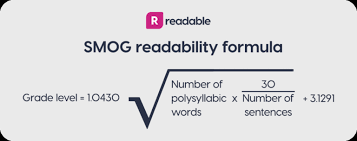

In [ ]:
# Create a function to calculate Smog Index
def calculate_smog_index(i, description):
  try:
    return textstat.smog_index(description)
  except Exception as e:
    print(e)
    print(3, i, description)
    return -1

### **4. Gunning Fog Index**
#### The principle behind the Gunning Fog Index formula is that short sentences written in plain English receive a better score than longer sentences written in complex language.
#### Gunning Fox Index Formula
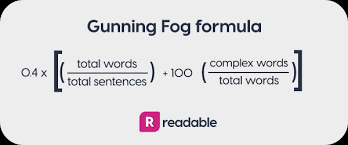

In [ ]:
# Create a function to calculate Gunning Fox Index
def calculate_gunning_fog_index(i, description):
  try:
    return textstat.gunning_fog(description)
  except Exception as e:
    print(e)
    print(4, i, description)
    return -1

### **5. Coleman Liau Index**
#### Instead of syllables per word and sentence lengths, the Coleman Liau Index relies on characters and uses computerized assessments to understand characters more easily and accurately.
#### Coleman Liau Index Formula:
### **5.89 x (characters/words) - 0.3 x (sentences/words) – 15.8**

In [ ]:
# Create a function to calculate Coleman Liau Index
def calculate_coleman_liau_index(i, description):
  try:
    return textstat.coleman_liau_index(description)
  except Exception as e:
    print(e)
    print(5, i, description)
    return -1

### **6. Automated Readability Index**
#### The automated readability index is a readability test designed to measure the how easy your text is to understand. ARI is derived from ratios that represent word difficulty (number of letters per word) and sentence difficulty (number of words per sentence).
#### Automated Readability Index Formula
### **4.71 x (characters/words) + 0.5 x (words/sentences) - 21.43**

In [ ]:
# Create a function to calculate Automated Readability Index
def calculate_automated_readability_index(i, description):
  try:
    return textstat.automated_readability_index(description)
  except Exception as e:
    print(e)
    print(6, i, description)
    return -1

### **7. Linsear Write Index**
#### Linsear Write is a readability metric for English text. The result is a "grade level" measure, reflecting the estimated years of education needed to read the text fluently.
#### Linsear Write Formula:
### For each "easy word", defined as words with 2 syllables or less, add 1 point.
### For each "hard word", defined as words with 3 syllables or more, add 3 points.
### Divide the points by the number of sentences in the 100-word sample.

In [ ]:
# Create a function to calculate Linsear Write Index
def calculate_linsear_write_index(i, description):
  try:
    return textstat.linsear_write_formula(description)
  except Exception as e:
    print(e)
    print(7, i, description)
    return -1

### **8. Dale Chall Readability Index**
#### The Dale–Chall readability formula is a readability test that provides a numeric gauge of the comprehension difficulty that readers come upon when reading a text. It uses a list of 3000 words that groups of fourth-grade American students could reliably understand, considering any word not on that list to be difficult.
#### Dale Chall Readability Index Formula:
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/0541f1e629f0c06796c5a5babb3fac8d100a858c'>

In [ ]:
# Create a function to calculate Dale Chall Readability Index
def calculate_dale_chall_readability_index(i, description):
  try:
    return textstat.dale_chall_readability_score(description)
  except Exception as e:
    print(e)
    print(8, i, description)
    return -1

### **9. Readability Consensus based upon all the above tests**
#### Based upon all the above tests, returns the estimated school grade level required to understand the text.

In [ ]:
# Create a function to calculate Readability Consensus
def calculate_readability_consensus(i, description):
  try:
    return textstat.text_standard(description)
  except Exception as e:
    print(e)
    print(9, i, description)
    return ""

### **Calculating The Above Mentioned Metrics For Entire Data.**

In [ ]:
n_flesh_kincaid_reading_ease = []
n_flesh_kincaid_grade_level = []
n_smog_index = []
n_gunning_fog_index = []
n_coleman_liau_index = []
n_automated_readability_index = []
n_linsear_write_index = []
n_dale_chall_readability_index = []
n_readability_consensus = []

flesh_kincaid_reading_ease_error = []
flesh_kincaid_grade_level_error = []
smog_index_error = []
gunning_fox_index_error = []
coleman_liau_index_error = []
automated_readability_index_error = []
linsear_write_index_error = []
dale_chall_readability_index_error = []
readability_consensus_error = []

for i in range(len(df)):
  description = df.loc[i, 'blurb']
  #print(i)

  # Flesh Kincaid Reading Ease
  flesh_kincaid_reading_ease = calculate_flesh_kincaid_reading_ease(i, description)
  if flesh_kincaid_reading_ease > 100:
    flesh_kincaid_reading_ease = 100
  elif flesh_kincaid_reading_ease < 0:
    flesh_kincaid_reading_ease = 0
    flesh_kincaid_reading_ease_error.append(i)
  n_flesh_kincaid_reading_ease.append(flesh_kincaid_reading_ease)

  # Flesh Kincaid Grade Level
  flesh_kincaid_grade_level = calculate_flesh_kincaid_grade_level(i, description)
  if flesh_kincaid_grade_level < 0:
    flesh_kincaid_grade_level = 0
    flesh_kincaid_grade_level_error.append(i)
  n_flesh_kincaid_grade_level.append(flesh_kincaid_grade_level)

  # Smog Index
  smog_index = calculate_smog_index(i, description)
  if smog_index < 0:
    smog_index = 0
    smog_index_error.append(i)
  n_smog_index.append(smog_index)

  # Gunning Fog Index
  gunning_fog_index = calculate_gunning_fog_index(i, description)
  if gunning_fog_index < 0:
    gunning_fog_index = 0
    gunning_fox_index_error.append(i)
  n_gunning_fog_index.append(gunning_fog_index)

  # Coleman Liau Index
  coleman_liau_index = calculate_coleman_liau_index(i, description)
  if coleman_liau_index < 0:
    coleman_liau_index = 0
    coleman_liau_index_error.append(i)
  n_coleman_liau_index.append(coleman_liau_index)

  # Automated Readability Index
  automated_readability_index = calculate_automated_readability_index(i, description)
  if automated_readability_index < 0:
    automated_readability_index = 0
    automated_readability_index_error.append(i)
  n_automated_readability_index.append(automated_readability_index)

  # Linsear Write Index
  linsear_write_index = calculate_linsear_write_index(i, description)
  if linsear_write_index < 0:
    linsear_write_index = 0
    linsear_write_index_error.append(i)
  n_linsear_write_index.append(linsear_write_index)

  # Dale Chall Readability Index
  dale_chall_readability_index = calculate_dale_chall_readability_index(i, description)
  if dale_chall_readability_index < 0:
    dale_chall_readability_index = 0
    dale_chall_readability_index_error.append(i)
  n_dale_chall_readability_index.append(dale_chall_readability_index)

  # Readability Consensus
  readability_consensus = calculate_readability_consensus(i, description)
  if readability_consensus == "":
    readability_consensus = None
    readability_consensus_error.append(i)
  n_readability_consensus.append(readability_consensus)

Streaming output truncated to the last 5000 lines.
179830
179831
179832
179833
179834
179835
179836
179837
179838
179839
179840
179841
179842
179843
179844
179845
179846
179847
179848
179849
179850
179851
179852
179853
179854
179855
179856
179857
179858
179859
179860
179861
179862
179863
179864
179865
179866
179867
179868
179869
179870
179871
179872
179873
179874
179875
179876
179877
179878
179879
179880
179881
179882
179883
179884
179885
179886
179887
179888
179889
179890
179891
179892
179893
179894
179895
179896
179897
179898
179899
179900
179901
179902
179903
179904
179905
179906
179907
179908
179909
179910
179911
179912
179913
179914
179915
179916
179917
179918
179919
179920
179921
179922
179923
179924
179925
179926
179927
179928
179929
179930
179931
179932
179933
179934
179935
179936
179937
179938
179939
179940
179941
179942
179943
179944
179945
179946
179947
179948
179949
179950
179951
179952
179953
179954
179955
179956
179957
179958
179959
179960
179961
179962
179963
179964
1799

In [ ]:
# Identifying Errors
print("Flesh Kincaid Reading Ease Error", len(flesh_kincaid_reading_ease_error), flesh_kincaid_reading_ease_error)
print("Flesh Kincaid Grade Level Error", len(flesh_kincaid_grade_level_error), flesh_kincaid_grade_level_error)
print("Smog Index Error", len(smog_index_error), smog_index_error)
print("Gunning Fog Index Error", len(gunning_fox_index_error), gunning_fox_index_error)
print("Coleman Liau Index Error", len(coleman_liau_index_error), coleman_liau_index_error)
print("Automated Readability Index Error", len(automated_readability_index_error), automated_readability_index_error)
print("Linsear Write Index Error", len(linsear_write_index_error), linsear_write_index_error)
print("Dale Chall Readability Index Error", len(dale_chall_readability_index_error), dale_chall_readability_index_error)
print("Readability Consensus Error", len(readability_consensus_error), readability_consensus_error)

Flesh Kincaid Reading Ease Error 2350 [35, 38, 61, 87, 193, 324, 352, 441, 583, 592, 702, 757, 791, 810, 828, 899, 1050, 1091, 1094, 1123, 1172, 1222, 1244, 1328, 1380, 1391, 1427, 1530, 1728, 1756, 1783, 2051, 2064, 2123, 2131, 2231, 2435, 2487, 2565, 2575, 2622, 2668, 2767, 2838, 3037, 3052, 3195, 3229, 3243, 3362, 3383, 3449, 3585, 3670, 4071, 4345, 4366, 4707, 4727, 4890, 4915, 4924, 4927, 5040, 5084, 5171, 5179, 5240, 5344, 5375, 5378, 5464, 5556, 5692, 5824, 5926, 6296, 6319, 6327, 6361, 6540, 6800, 6826, 6882, 6884, 7002, 7096, 7097, 7148, 7151, 7214, 7343, 7443, 7695, 7731, 7819, 7911, 8006, 8055, 8166, 8188, 8214, 8243, 8264, 8315, 8367, 8539, 8583, 8609, 8613, 8624, 8725, 8910, 9155, 9374, 9417, 9453, 9518, 9520, 9574, 9616, 9634, 9710, 9781, 9836, 9844, 9869, 9888, 9956, 10017, 10021, 10059, 10209, 10796, 10866, 10966, 11087, 11344, 11352, 11365, 11375, 11473, 11524, 11653, 11751, 11771, 11816, 12050, 12164, 12374, 12514, 12518, 12521, 12583, 12633, 12657, 12714, 12765, 1289

In [ ]:
arr1 = list(n_flesh_kincaid_reading_ease)
arr2 = list(n_flesh_kincaid_grade_level)
arr3 = list(n_smog_index)
arr4 = list(n_gunning_fog_index)
arr5 = list(n_coleman_liau_index)
arr6 = list(n_automated_readability_index)
arr7 = list(n_linsear_write_index)
arr8 = list(n_dale_chall_readability_index)
arr9 = list(n_readability_consensus)

In [ ]:
# Resolving Errors
error_set = set()
for i in range(len(flesh_kincaid_reading_ease_error)):
  error_set.add(flesh_kincaid_reading_ease_error[i])
for i in range(len(flesh_kincaid_grade_level_error)):
  error_set.add(flesh_kincaid_grade_level_error[i])
for i in range(len(smog_index_error)):
  error_set.add(smog_index_error[i])
for i in range(len(gunning_fox_index_error)):
  error_set.add(gunning_fox_index_error[i])
for i in range(len(coleman_liau_index_error)):
  error_set.add(coleman_liau_index_error[i])
for i in range(len(automated_readability_index_error)):
  error_set.add(automated_readability_index_error[i])
for i in range(len(linsear_write_index_error)):
  error_set.add(linsear_write_index_error[i])
for i in range(len(dale_chall_readability_index_error)):
  error_set.add(dale_chall_readability_index_error[i])
for i in range(len(readability_consensus_error)):
  error_set.add(readability_consensus_error[i])
error_list = list(error_set)
print("Errors: ", len(error_list))

Errors:  3935


In [ ]:
# Resolving Errors
df.drop(error_list, inplace=True)

for i in error_list:
  n_flesh_kincaid_reading_ease[i] = ""
  n_flesh_kincaid_grade_level[i] = ""
  n_smog_index[i] = ""
  n_gunning_fog_index[i] = ""
  n_coleman_liau_index[i] = ""
  n_automated_readability_index[i] = ""
  n_linsear_write_index[i] = ""
  n_dale_chall_readability_index[i] = ""
  n_readability_consensus[i] = ""

df = df.reset_index(drop=True)

n_flesh_kincaid_reading_ease = [j for j in n_flesh_kincaid_reading_ease if j != ""]
n_flesh_kincaid_grade_level = [j for j in n_flesh_kincaid_grade_level if j != ""]
n_smog_index = [j for j in n_smog_index if j != ""]
n_gunning_fog_index = [j for j in n_gunning_fog_index if j != ""]
n_coleman_liau_index = [j for j in n_coleman_liau_index if j != ""]
n_automated_readability_index = [j for j in n_automated_readability_index if j != ""]
n_linsear_write_index = [j for j in n_linsear_write_index if j != ""]
n_dale_chall_readability_index = [j for j in n_dale_chall_readability_index if j != ""]
n_readability_consensus = [j for j in n_readability_consensus if j != ""]

df.shape

(180895, 11)

In [ ]:
# Adding new columns in the dataframe
df['n_flesh_kincaid_reading_ease'] = n_flesh_kincaid_reading_ease
df['n_flesh_kincaid_grade_level'] = n_flesh_kincaid_grade_level
df['n_smog_index'] = n_smog_index
df['n_gunning_fog_index'] = n_gunning_fog_index
df['n_coleman_liau_index'] = n_coleman_liau_index
df['n_automated_readability_index'] = n_automated_readability_index
df['n_linsear_write_index'] = n_linsear_write_index
df['n_dale_chall_readability_index'] = n_dale_chall_readability_index
df['n_readability_consensus'] = n_readability_consensus
df.head()

,blurb,state,parent_category,n_words,n_sentences,n_characters,n_unique_words,n_long_words,n_syllables,n_monosyllables,n_polysyllables,n_flesh_kincaid_reading_ease,n_flesh_kincaid_grade_level,n_smog_index,n_gunning_fog_index,n_coleman_liau_index,n_automated_readability_index,n_linsear_write_index,n_dale_chall_readability_index,n_readability_consensus
0,A film about chance meetings and changed lives.,1,Film & Video,8,1,40,8,3,13,3,5,100.00,0.5,0.0,3.20,8.66,6.1,3.00,6.01,2nd and 3rd grade
1,Milestone Broadcast is producing www.peaceday...,1,Film & Video,15,1,115,15,3,32,5,10,43.73,11.9,0.0,11.81,14.45,16.6,12.00,8.73,11th and 12th grade
2,Teaching kids computer science and robotics th...,1,Technology,16,1,91,14,9,27,9,7,55.24,9.5,0.0,11.40,15.08,13.4,12.00,8.38,9th and 10th grade
3,Share everything in life's journey with your p...,1,Design,19,2,108,17,8,38,7,12,53.37,8.2,0.0,10.12,13.02,10.1,6.25,7.43,9th and 10th grade
4,This book is dedicated to your inner child. It...,1,Publishing,20,2,95,18,7,31,13,7,69.79,6.0,0.0,6.00,8.21,5.9,5.00,7.29,5th and 6th grade


In [ ]:
# Convert Dataframe to CSV File
df.to_csv("NLP Metric Evaluation 2.csv", index=False)

### **Data Analysis**

In [ ]:
# Load the dataset
df = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/5.NLP Metric Evaluation of General Dataset/Analysis/NLP Metric Evaluation 2.csv')
df.head()

,blurb,state,parent_category,n_words,n_sentences,n_characters,n_unique_words,n_long_words,n_syllables,n_monosyllables,n_polysyllables,n_flesh_kincaid_reading_ease,n_flesh_kincaid_grade_level,n_smog_index,n_gunning_fog_index,n_coleman_liau_index,n_automated_readability_index,n_linsear_write_index,n_dale_chall_readability_index,n_readability_consensus
0,A film about chance meetings and changed lives.,1,Film & Video,8,1,40,8,3,13,3,5,100.00,0.5,0.0,3.20,8.66,6.1,3.00,6.01,2nd and 3rd grade
1,Milestone Broadcast is producing www.peaceday...,1,Film & Video,15,1,115,15,3,32,5,10,43.73,11.9,0.0,11.81,14.45,16.6,12.00,8.73,11th and 12th grade
2,Teaching kids computer science and robotics th...,1,Technology,16,1,91,14,9,27,9,7,55.24,9.5,0.0,11.40,15.08,13.4,12.00,8.38,9th and 10th grade
3,Share everything in life's journey with your p...,1,Design,19,2,108,17,8,38,7,12,53.37,8.2,0.0,10.12,13.02,10.1,6.25,7.43,9th and 10th grade
4,This book is dedicated to your inner child. It...,1,Publishing,20,2,95,18,7,31,13,7,69.79,6.0,0.0,6.00,8.21,5.9,5.00,7.29,5th and 6th grade


In [ ]:
df_ml = df[['state','n_flesh_kincaid_reading_ease','n_flesh_kincaid_grade_level','n_smog_index','n_gunning_fog_index','n_coleman_liau_index','n_automated_readability_index','n_linsear_write_index','n_dale_chall_readability_index','n_readability_consensus']]
df_ml.head()

,state,n_flesh_kincaid_reading_ease,n_flesh_kincaid_grade_level,n_smog_index,n_gunning_fog_index,n_coleman_liau_index,n_automated_readability_index,n_linsear_write_index,n_dale_chall_readability_index,n_readability_consensus
0,1,100.00,0.5,0.0,3.20,8.66,6.1,3.00,6.01,2nd and 3rd grade
1,1,43.73,11.9,0.0,11.81,14.45,16.6,12.00,8.73,11th and 12th grade
2,1,55.24,9.5,0.0,11.40,15.08,13.4,12.00,8.38,9th and 10th grade
3,1,53.37,8.2,0.0,10.12,13.02,10.1,6.25,7.43,9th and 10th grade
4,1,69.79,6.0,0.0,6.00,8.21,5.9,5.00,7.29,5th and 6th grade


In [ ]:
# Import Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### **Project State Analysis**

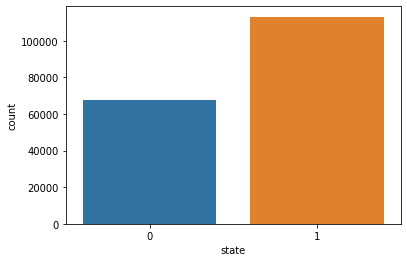

In [ ]:
# Analysye the State of all Projects
sns.countplot(x='state', data=df_ml)

### **Analysis**: We have around 1,20,000 Successful Projects and 60,000 Failed Projects.

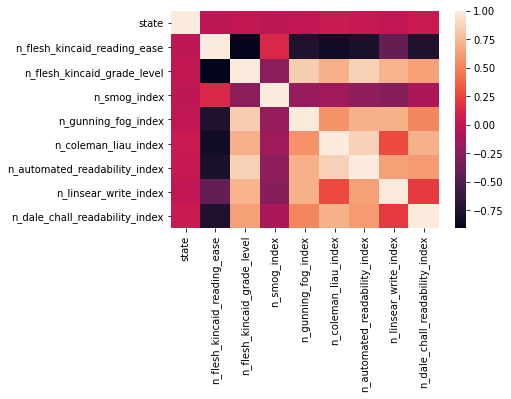

In [ ]:
# Analyse the Correlation among all attributes
sns.heatmap(df_ml.corr())

### **Flesch Kincaid Reading Ease Analysis**

In [ ]:
df_ml['n_flesh_kincaid_reading_ease'].describe()

count    180895.000000
mean         60.977750
std          20.116539
min           0.080000
25%          48.160000
50%          62.340000
75%          75.710000
max         100.000000
Name: n_flesh_kincaid_reading_ease, dtype: float64

In [ ]:
df_new1 = df_ml[['n_flesh_kincaid_reading_ease', 'state']]
df_new1.head()

,n_flesh_kincaid_reading_ease,state
0,100.00,1
1,43.73,1
2,55.24,1
3,53.37,1
4,69.79,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


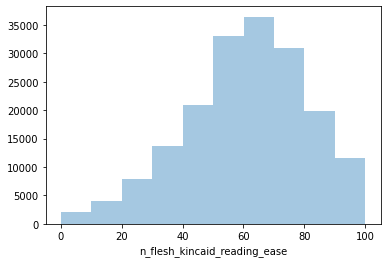

In [ ]:
# Histogram Distribution
sns.distplot(df_new1['n_flesh_kincaid_reading_ease'], kde=False, bins=10)

In [ ]:
# Convert Numerical Data to Categorical Data
for i in range(len(df_new1)):
  value = df_new1.loc[i, 'n_flesh_kincaid_reading_ease']
  if value >= 0 and value < 20:
    df_new1.loc[i, 'n_flesh_kincaid_reading_ease'] = 'Extreme'
  elif value >= 20 and value < 40:
    df_new1.loc[i, 'n_flesh_kincaid_reading_ease'] = 'Difficult'
  elif value >= 40 and value < 60:
    df_new1.loc[i, 'n_flesh_kincaid_reading_ease'] = 'Hard'
  elif value >= 60 and value < 80:
    df_new1.loc[i, 'n_flesh_kincaid_reading_ease'] = 'Medium'
  elif value >= 80 and value <= 100:
    df_new1.loc[i, 'n_flesh_kincaid_reading_ease'] = 'Easy'
df_new1.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,n_flesh_kincaid_reading_ease,state
0,Easy,1
1,Hard,1
2,Hard,1
3,Hard,1
4,Medium,1


In [ ]:
df_new1['n_flesh_kincaid_reading_ease'].unique()

array(['Easy', 'Hard', 'Medium', 'Difficult', 'Extreme'], dtype=object)

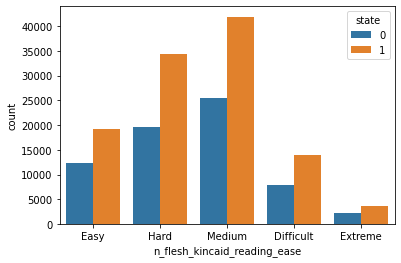

In [ ]:
# Classification based on Flesh Kincaid Reading Index and State of the Project
sns.countplot(x='n_flesh_kincaid_reading_ease', hue='state', data=df_new1)

### **Analysis:** Majority of the Successful Projects have the Mean Value as Reading Ease.

### **Flesch Kincaid Grade Level Analysis**

In [ ]:
df_ml['n_flesh_kincaid_grade_level'].describe()

count    180895.000000
mean          8.555492
std           3.329642
min           0.000000
25%           6.000000
50%           8.700000
75%          10.900000
max          18.200000
Name: n_flesh_kincaid_grade_level, dtype: float64

In [ ]:
df_new2 = df_ml[['n_flesh_kincaid_grade_level', 'state']]
df_new2.head()

,n_flesh_kincaid_grade_level,state
0,0.5,1
1,11.9,1
2,9.5,1
3,8.2,1
4,6.0,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


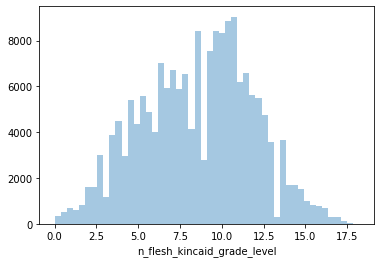

In [ ]:
# Histogram Distribution
sns.distplot(df_new2['n_flesh_kincaid_grade_level'], kde=False)

In [ ]:
# Converting Numerical Data into Categorical Data
for i in range(len(df_new2)):
  value = df_new2.loc[i, 'n_flesh_kincaid_grade_level']
  if value >= 0 and value <= 4:
    df_new2.loc[i, 'n_flesh_kincaid_grade_level'] = 'Easy'
  elif value > 4 and value <= 8:
    df_new2.loc[i, 'n_flesh_kincaid_grade_level'] = 'Medium'
  elif value > 8 and value <= 12:
    df_new2.loc[i, 'n_flesh_kincaid_grade_level'] = 'Hard'
  elif value > 12 and value <= 16:
    df_new2.loc[i, 'n_flesh_kincaid_grade_level'] = 'Difficult'
  elif value > 16 and value <= 20:
    df_new2.loc[i, 'n_flesh_kincaid_grade_level'] = 'Extreme'
df_new2.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,n_flesh_kincaid_grade_level,state
0,Easy,1
1,Hard,1
2,Hard,1
3,Hard,1
4,Medium,1


In [ ]:
df_new2['n_flesh_kincaid_grade_level'].unique()

array(['Easy', 'Hard', 'Medium', 'Difficult', 'Extreme'], dtype=object)

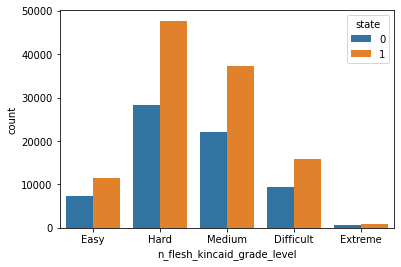

In [ ]:
sns.countplot(x='n_flesh_kincaid_grade_level', hue='state', data=df_new2)

### **Analysis:** We observe that most of the projects have Flesh Kincaid Grade Level between 8 and 12. Also, Projects with Flesh Kincaid Score between 0-4 and 16-20 have very little chances of success.

### **Smog Index Analysis**

In [ ]:
df_ml['n_smog_index'].describe()

count    180895.000000
mean          0.274775
std           1.428901
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.900000
Name: n_smog_index, dtype: float64

In [ ]:
df_new3 = df_ml[['n_smog_index', 'state']]
df_new3.head()

,n_smog_index,state
0,0.0,1
1,0.0,1
2,0.0,1
3,0.0,1
4,0.0,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


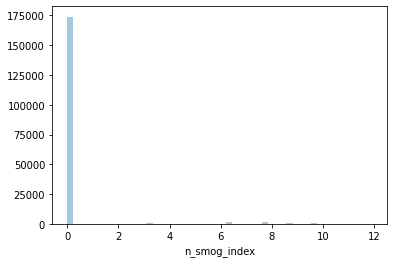

In [ ]:
# Histogram Distribution
sns.distplot(df_new3['n_smog_index'], kde=False)

### **Analysis:** We observe that Smog Index of majority of the projects is 0. This might have occurred because Smog Index is usually calculated on Long Passages of atleast 30 Sentences. Hence, this column is not of any use. We will drop the Smog Index.

In [ ]:
# Drop Smog Index
df_ml.drop(['n_smog_index'], axis=1, inplace=True)
df.drop(['n_smog_index'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### **Gunning Fog Index Analysis**

In [ ]:
df_ml['n_gunning_fog_index'].describe()

count    180895.000000
mean         10.465073
std           3.989153
min           0.800000
25%           8.010000
50%          10.420000
75%          13.200000
max          29.070000
Name: n_gunning_fog_index, dtype: float64

In [ ]:
df_new4 = df_ml[['n_gunning_fog_index', 'state']]
df_new4.head()

,n_gunning_fog_index,state
0,3.20,1
1,11.81,1
2,11.40,1
3,10.12,1
4,6.00,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


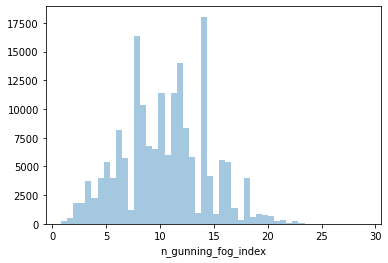

In [ ]:
# Histogram Distribution
sns.distplot(df_new4['n_gunning_fog_index'], kde=False)

### **Analysis:** Gunning Fog Index is between 0-20. We will remove the projects with Gunning Fog Index greater than 20.

In [ ]:
# Data Cleaning
index_names = []
for i in range(len(df_new4)):
  value = df_new4.loc[i, 'n_gunning_fog_index']
  if value > 20 and value <= 21:
    df_new4.loc[i, 'n_gunning_fog_index'] = 20
  elif value > 21:
    index_names.append(i)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
# Data Cleaning
df_new4.drop(index_names, inplace=True)
df_ml.drop(index_names, inplace=True)
df.drop(index_names, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Data Cleaning
df_new4 = df_new4.reset_index(drop=True)
df_ml = df_ml.reset_index(drop=True)
df = df.reset_index(drop=True)

In [ ]:
# Converting Numerical Data into Categorical Data
for i in range(len(df_new4)):
  value = df_new4.loc[i, 'n_gunning_fog_index']
  if value >= 0 and value <= 4:
    df_new4.loc[i, 'n_gunning_fog_index'] = 'Easy'
  elif value > 4 and value <= 8:
    df_new4.loc[i, 'n_gunning_fog_index'] = 'Medium'
  elif value > 8 and value <= 12:
    df_new4.loc[i, 'n_gunning_fog_index'] = 'Hard'
  elif value > 12 and value <= 16:
    df_new4.loc[i, 'n_gunning_fog_index'] = 'Difficult'
  elif value > 16 and value <= 20:
    df_new4.loc[i, 'n_gunning_fog_index'] = 'Extreme'
df_new4.head()

,n_gunning_fog_index,state
0,Easy,1
1,Hard,1
2,Hard,1
3,Hard,1
4,Medium,1


In [ ]:
df_new4['n_gunning_fog_index'].unique()

array(['Easy', 'Hard', 'Medium', 'Difficult', 'Extreme'], dtype=object)

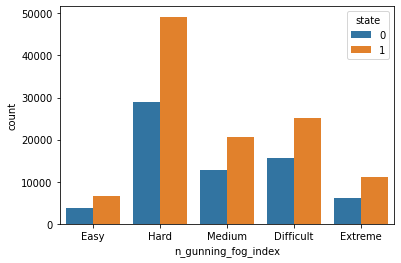

In [ ]:
sns.countplot(x='n_gunning_fog_index', hue='state', data=df_new4)

### **Analysis:** Majority of the projects have a Gunning Fog Index between 8-12.

### **Coleman Liau Index Analysis**

In [ ]:
df_ml['n_coleman_liau_index'].describe()

count    179997.000000
mean         10.657102
std           4.193371
min           0.000000
25%           7.700000
50%          10.370000
75%          13.270000
max          84.460000
Name: n_coleman_liau_index, dtype: float64

In [ ]:
df_new5 = df_ml[['n_coleman_liau_index', 'state']]
df_new5.head()

,n_coleman_liau_index,state
0,8.66,1
1,14.45,1
2,15.08,1
3,13.02,1
4,8.21,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


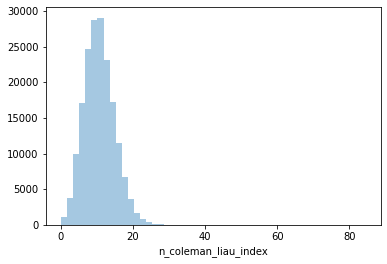

In [ ]:
# Histogram Distribution
sns.distplot(df_new5['n_coleman_liau_index'], kde=False)

### **Analysis:** We have many outliers in Coleman Liau Index of various projects. We will drop such projects with Coleman Liau Index greater than 23.

In [ ]:
# Data Cleaning
index_names = []
for i in range(len(df_new5)):
  value = df_new5.loc[i, 'n_coleman_liau_index']
  if value > 23:
    index_names.append(i)

In [ ]:
# Data Cleaning
df_new5.drop(index_names, inplace=True)
df_ml.drop(index_names, inplace=True)
df.drop(index_names, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Data Cleaning
df_new5 = df_new5.reset_index(drop=True)
df_ml = df_ml.reset_index(drop=True)
df = df.reset_index(drop=True)

In [ ]:
# Converting Numerical Data into Categorical Data
for i in range(len(df_new5)):
  value = df_new5.loc[i, 'n_coleman_liau_index']
  if value >= 0 and value <= 4:
    df_new5.loc[i, 'n_coleman_liau_index'] = 'Easy'
  elif value > 4 and value <= 8:
    df_new5.loc[i, 'n_coleman_liau_index'] = 'Medium'
  elif value > 8 and value <= 12:
    df_new5.loc[i, 'n_coleman_liau_index'] = 'Hard'
  elif value > 12 and value <= 16:
    df_new5.loc[i, 'n_coleman_liau_index'] = 'Difficult'
  elif value > 16:
    df_new5.loc[i, 'n_coleman_liau_index'] = 'Extreme'
df_new5.head()

,n_coleman_liau_index,state
0,Hard,1
1,Difficult,1
2,Difficult,1
3,Difficult,1
4,Hard,1


In [ ]:
df_new5['n_coleman_liau_index'].unique()

array(['Hard', 'Difficult', 'Extreme', 'Medium', 'Easy'], dtype=object)

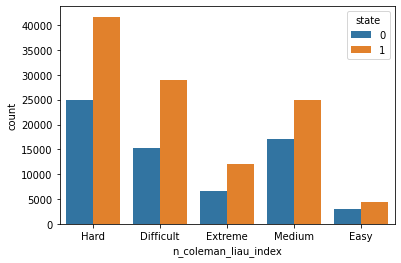

In [ ]:
sns.countplot(x='n_coleman_liau_index', hue='state', data=df_new5)

### **Analysis:** Coleman Liau Index of 8-12 and 12-16 are the indexes for majority of the projects.

### **Automated Readability Index Analysis**

In [ ]:
df_ml['n_automated_readability_index'].describe()

count    179101.000000
mean         10.360508
std           3.965952
min           0.000000
25%           7.400000
50%          10.800000
75%          13.200000
max          46.400000
Name: n_automated_readability_index, dtype: float64

In [ ]:
df_new6 = df_ml[['n_automated_readability_index', 'state']]
df_new6.head()

,n_automated_readability_index,state
0,6.1,1
1,16.6,1
2,13.4,1
3,10.1,1
4,5.9,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


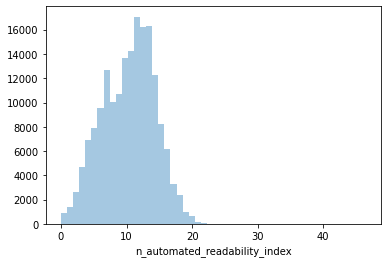

In [ ]:
# Histogram Distribution
sns.distplot(df_new6['n_automated_readability_index'], kde=False)

In [ ]:
# Data Cleaning
df_new6.drop(131106, inplace=True)
df_ml.drop(131106, inplace=True)
df.drop(131106, inplace=True)
df_new6 = df_new6.reset_index(drop=True)
df_ml = df_ml.reset_index(drop=True)
df = df.reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Converting Numerical Data into Categorical Data
for i in range(len(df_new6)):
  value = df_new6.loc[i, 'n_automated_readability_index']
  if value >= 0 and value <= 5:
    df_new6.loc[i, 'n_automated_readability_index'] = 'Easy'
  elif value > 5 and value <= 10:
    df_new6.loc[i, 'n_automated_readability_index'] = 'Medium'
  elif value > 10 and value <= 15:
    df_new6.loc[i, 'n_automated_readability_index'] = 'Hard'
  elif value > 15 and value <= 20:
    df_new6.loc[i, 'n_automated_readability_index'] = 'Difficult'
  elif value > 20:
    df_new6.loc[i, 'n_automated_readability_index'] = 'Extreme'
df_new6.head()

,n_automated_readability_index,state
0,Medium,1
1,Difficult,1
2,Hard,1
3,Hard,1
4,Medium,1


In [ ]:
df_new6['n_automated_readability_index'].unique()

array(['Medium', 'Difficult', 'Hard', 'Easy', 'Extreme'], dtype=object)

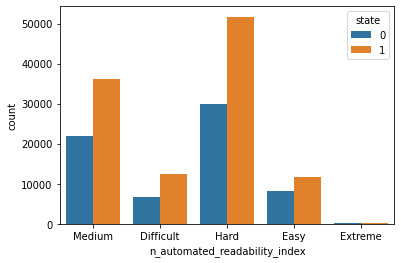

In [ ]:
sns.countplot(x='n_automated_readability_index', hue='state', data=df_new6)

### **Analysis:** A vast majority of projects have Automated Readability Index between the range 5 and 15.

### **Linsear Write Index Analysis**

In [ ]:
df_ml['n_linsear_write_index'].describe()

count    179100.000000
mean          8.821034
std           4.076502
min           0.000000
25%           5.500000
50%           8.000000
75%          12.500000
max          19.000000
Name: n_linsear_write_index, dtype: float64

In [ ]:
df_new7 = df_ml[['n_linsear_write_index', 'state']]
df_new7.head()

,n_linsear_write_index,state
0,3.00,1
1,12.00,1
2,12.00,1
3,6.25,1
4,5.00,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


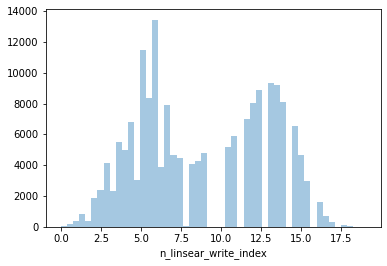

In [ ]:
# Histogram Distribution
sns.distplot(df_new7['n_linsear_write_index'], kde=False)

### **Dale Chall Readability Index Analysis**

In [ ]:
df_ml['n_dale_chall_readability_index'].describe()

count    179100.000000
mean          8.529939
std           2.245122
min           0.100000
25%           7.210000
50%           8.490000
75%           9.940000
max          19.620000
Name: n_dale_chall_readability_index, dtype: float64

In [ ]:
df_new8 = df_ml[['n_dale_chall_readability_index', 'state']]
df_new8.head()

,n_dale_chall_readability_index,state
0,6.01,1
1,8.73,1
2,8.38,1
3,7.43,1
4,7.29,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


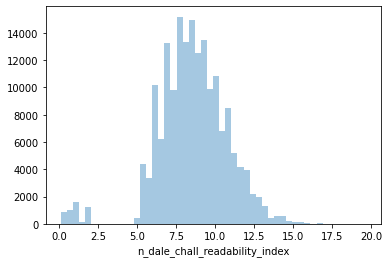

In [ ]:
# Histogram Distribution
sns.distplot(df_new8['n_dale_chall_readability_index'], kde=False)

### **Readability Consensus Analysis**

In [ ]:
df_new9 = df_ml[['n_readability_consensus', 'state']]
df_new9.head()

,n_readability_consensus,state
0,2nd and 3rd grade,1
1,11th and 12th grade,1
2,9th and 10th grade,1
3,9th and 10th grade,1
4,5th and 6th grade,1


In [ ]:
df_new9['n_readability_consensus'].unique()

array(['2nd and 3rd grade', '11th and 12th grade', '9th and 10th grade',
       '5th and 6th grade', '7th and 8th grade', '8th and 9th grade',
       '12th and 13th grade', '13th and 14th grade', '3rd and 4th grade',
       '6th and 7th grade', '4th and 5th grade', '10th and 11th grade',
       '14th and 15th grade', '15th and 16th grade', '1st and 2nd grade',
       '16th and 17th grade', '0th and 1st grade', '-1th and 0th grade',
       '20th and 21st grade', '18th and 19th grade',
       '17th and 18th grade', '19th and 20th grade',
       '21st and 22nd grade', '22nd and 23rd grade'], dtype=object)

In [ ]:
# Converting Categorical Data into Numerical data
for i in range(len(df_new9)):
  value = df_new9.loc[i, 'n_readability_consensus']
  words = value.split('and ')
  words2 = words[1].split(' ')
  subs = words2[0]
  subs = subs[0:-2]
  val = int(subs)
  df_new9.loc[i, 'n_readability_consensus'] = val
  """
  if value == '-1th and 0th grade':
    df_new9.loc[i, 'n_readability_consensus'] = 0
  elif value == '0th and 1st grade':
    df_new9.loc[i, 'n_readability_consensus'] = 1
  elif value == '1st and 2nd grade':
    df_new9.loc[i, 'n_readability_consensus'] = 2
  elif value == '2nd and 3rd grade':
    df_new9.loc[i, 'n_readability_consensus'] = 3
  elif value == '3rd and 4th grade':
    df_new9.loc[i, 'n_readability_consensus'] = 4
  elif value == '4th and 5th grade':
    df_new9.loc[i, 'n_readability_consensus'] = 5
  elif value == '5th and 6th grade':
    df_new9.loc[i, 'n_readability_consensus'] = 6
  elif value == '6th and 7th grade':
    df_new9.loc[i, 'n_readability_consensus'] = 7
  elif value == '7th and 8th grade':
    df_new9.loc[i, 'n_readability_consensus'] = 8
  elif value == '8th and 9th grade':
    df_new9.loc[i, 'n_readability_consensus'] = 9
  elif value == '9th and 10th grade':
    df_new9.loc[i, 'n_readability_consensus'] = 10
  elif value == '10th and 11th grade':
    df_new9.loc[i, 'n_readability_consensus'] = 11
  elif value == '11th and 12th grade':
    df_new9.loc[i, 'n_readability_consensus'] = 12
  elif value == '12th and 13th grade':
    df_new9.loc[i, 'n_readability_consensus'] = 13
  elif value == '13th and 14th grade':
    df_new9.loc[i, 'n_readability_consensus'] = 14
  elif value == '14th and 15th grade':
    df_new9.loc[i, 'n_readability_consensus'] = 15
  elif value == '15th and 16th grade':
    df_new9.loc[i, 'n_readability_consensus'] = 16
  elif value == '16th and 17th grade':
    df_new9.loc[i, 'n_readability_consensus'] = 17
  elif value == '17th and 18th grade':
    df_new9.loc[i, 'n_readability_consensus'] = 18
  elif value == '18th and 19th grade':
    df_new9.loc[i, 'n_readability_consensus'] = 19
  elif value == '19th and 20th grade':
    df_new9.loc[i, 'n_readability_consensus'] = 20
  elif value == '20th and 21st grade':
    df_new9.loc[i, 'n_readability_consensus'] = 21
  elif value == '21st and 22nd grade':
    df_new9.loc[i, 'n_readability_consensus'] = 22
  elif value == '22nd and 23rd grade':
    df_new9.loc[i, 'n_readability_consensus'] = 23
    """
df_new9.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,n_readability_consensus,state
0,3,1
1,12,1
2,10,1
3,10,1
4,6,1


In [ ]:
df_new9['n_readability_consensus'].describe()

count     179100
unique        24
top           10
freq       20402
Name: n_readability_consensus, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


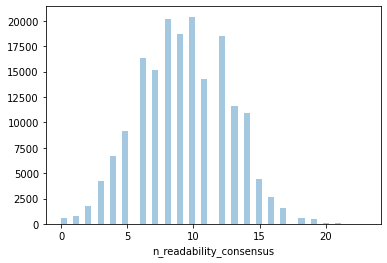

In [ ]:
# Histogram Distribution
sns.distplot(df_new9['n_readability_consensus'], kde=False)

In [ ]:
# Add numerical column to dataframe
df_ml.drop(['n_readability_consensus'], axis=1, inplace=True)
df.drop(['n_readability_consensus'], axis=1, inplace=True)
df_ml['n_readability_consensus'] = df_new9['n_readability_consensus']
df['n_readability_consensus'] = df_new9['n_readability_consensus']

In [ ]:
# Convert Dataframe to CSV File
df.to_csv("NLP Metric Evaluation 3.csv", index=False)

In [ ]:
# Convert Dataframe to CSV File
df_ml.to_csv("NLP Metric Evaluation ML.csv", index=False)

### **Machine Learning Models**

In [2]:
# Load the dataset
df = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/5.NLP Metric Evaluation of General Dataset/Analysis/NLP Metric Evaluation ML.csv')
df.head()

,state,n_flesh_kincaid_reading_ease,n_flesh_kincaid_grade_level,n_gunning_fog_index,n_coleman_liau_index,n_automated_readability_index,n_linsear_write_index,n_dale_chall_readability_index,n_readability_consensus
0,1,100.00,0.5,3.20,8.66,6.1,3.00,6.01,3
1,1,43.73,11.9,11.81,14.45,16.6,12.00,8.73,12
2,1,55.24,9.5,11.40,15.08,13.4,12.00,8.38,10
3,1,53.37,8.2,10.12,13.02,10.1,6.25,7.43,10
4,1,69.79,6.0,6.00,8.21,5.9,5.00,7.29,6


In [3]:
# Identifying the x and y
X = df.drop(['state'], axis=1)
y = df['state']

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [5]:
# Importing libaries 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [6]:
# Train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

### **1. Decision Tree Classifier**

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Score: ", dt.score(X_test, y_test))

Score:  0.6058905639307649


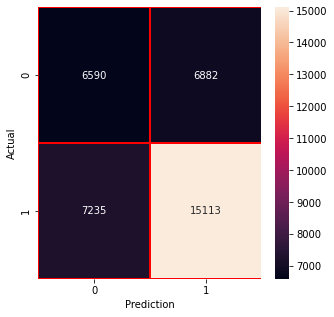

In [ ]:
# Confusion Matrix
y_predict = dt.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.48      0.49      0.48     13472
           1       0.69      0.68      0.68     22348

    accuracy                           0.61     35820
   macro avg       0.58      0.58      0.58     35820
weighted avg       0.61      0.61      0.61     35820



In [ ]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
dt_eval = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 10)
dt_eval.mean()

0.6028685092127304

In [ ]:
# ROC and AUC
y_prob = dt.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
dt.score(X_test, y_pred)

1.0

In [ ]:
# AUC Score
auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.5827100455247527

In [ ]:
# ROC Score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5904808628397828

Text(0.5, 0, 'False Positive Rate')

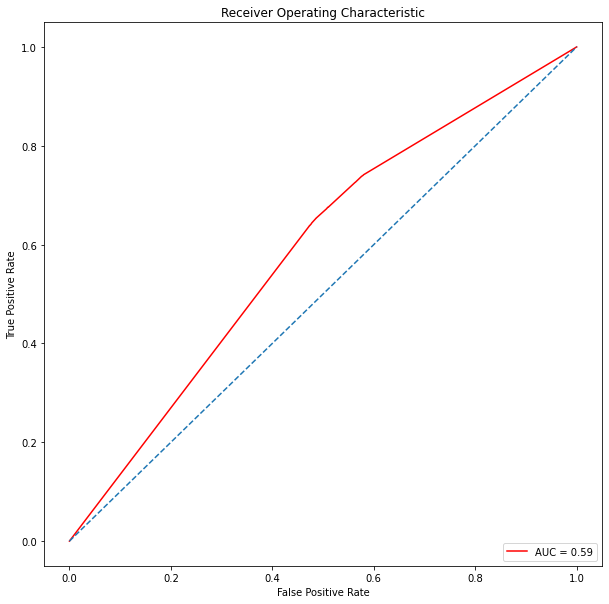

In [ ]:
# ROC Curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### **2. Random Forest**

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
for i in range(100, 1001, 100):
  clf = RandomForestClassifier(n_estimators=i)
  clf.fit(X_train, y_train)
  y_predict = clf.predict(X_test)
  print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.623785594639866
Accuracy: 0.623785594639866
Accuracy: 0.6245393634840871
Accuracy: 0.6249022892238972
Accuracy: 0.6249860413176996
Accuracy: 0.6227805695142379
Accuracy: 0.6252372975991066
Accuracy: 0.6254048017867113
Accuracy: 0.6243997766610832
Accuracy: 0.6258235622557231


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.6302624232272473


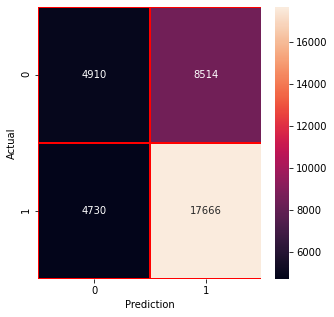

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.51      0.37      0.43     13424
           1       0.67      0.79      0.73     22396

    accuracy                           0.63     35820
   macro avg       0.59      0.58      0.58     35820
weighted avg       0.61      0.63      0.61     35820



In [ ]:
# ROC and AUC
y_prob = dt.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
dt.score(X_test, y_pred)

In [ ]:
# AUC Score
auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

In [ ]:
# ROC Score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
# ROC Curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### **3. SVM**

In [ ]:
# SVM 
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
print("Score: ", clf.score(X_test,y_test))

In [ ]:
# Confusion Matrix
y_predict = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

In [ ]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
clf_eval = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
clf_eval.mean()

In [ ]:
# ROC and AUC
y_prob = dt.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
dt.score(X_test, y_pred)

In [ ]:
# AUC Score
auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

In [ ]:
# ROC Score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
# ROC Curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### **4. K-Nearest Neighbors Classification**

In [ ]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier
for i in range(1, 101, 10):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  print("Score: ", neigh.score(X_test,y_test))

Score:  0.6108877721943049
Score:  0.6002512562814071
Score:  0.6065884980457845
Score:  0.6120603015075377
Score:  0.615605806811837
Score:  0.6195142378559464
Score:  0.6214126186487996
Score:  0.6227805695142379
Score:  0.6219151312116136
Score:  0.6229201563372417


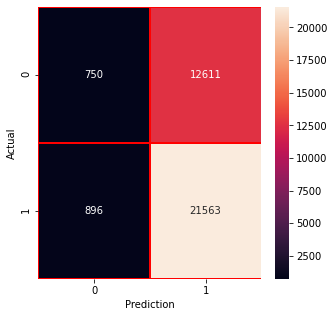

In [ ]:
# Confusion Matrix
y_predict = neigh.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.46      0.06      0.10     13361
           1       0.63      0.96      0.76     22459

    accuracy                           0.62     35820
   macro avg       0.54      0.51      0.43     35820
weighted avg       0.57      0.62      0.51     35820



In [ ]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
neigh_eval = cross_val_score(estimator = neigh, X = X_train, y = y_train, cv = 10)
neigh_eval.mean()

0.6232900614182022

In [ ]:
# ROC and AUC
y_prob = neigh.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
neigh.score(X_test, y_pred)

1.0

In [ ]:
# AUC Score
auc_roc=metrics.roc_auc_score(y_test, y_pred)
auc_roc

0.5081193016542858

In [ ]:
# ROC Score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5450112323531815

Text(0.5, 0, 'False Positive Rate')

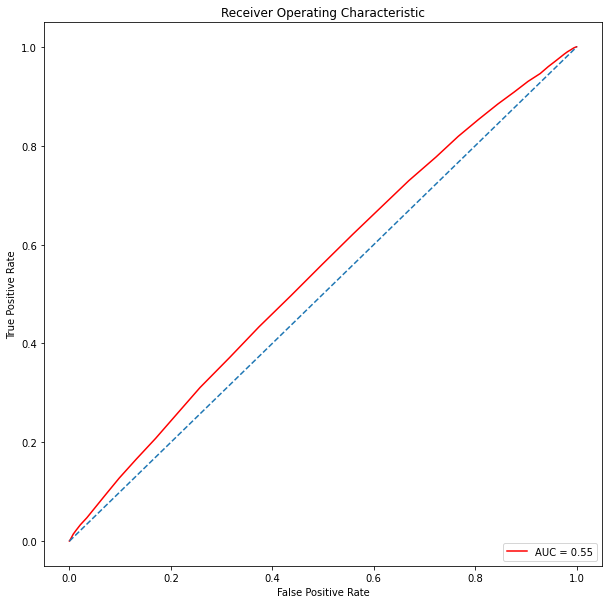

In [ ]:
# ROC Curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### **5. Logistic Regression**

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Score: ", lr.score(X_test,y_test))

Score:  0.6262981574539364


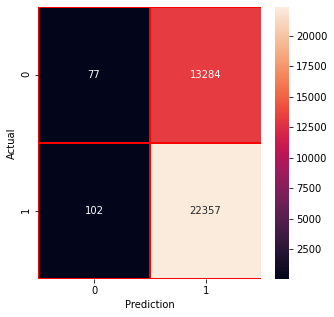

In [ ]:
# Confusion Matrix
y_predict = lr.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.43      0.01      0.01     13361
           1       0.63      1.00      0.77     22459

    accuracy                           0.63     35820
   macro avg       0.53      0.50      0.39     35820
weighted avg       0.55      0.63      0.49     35820



In [ ]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
lr_eval = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
lr_eval.mean()

0.6259212730318258

In [ ]:
# ROC and AUC
y_prob = lr.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
lr.score(X_test, y_pred)

1.0

In [ ]:
# AUC Score
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.5006107162670186

In [ ]:
# ROC Score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5492854764139912

Text(0.5, 0, 'False Positive Rate')

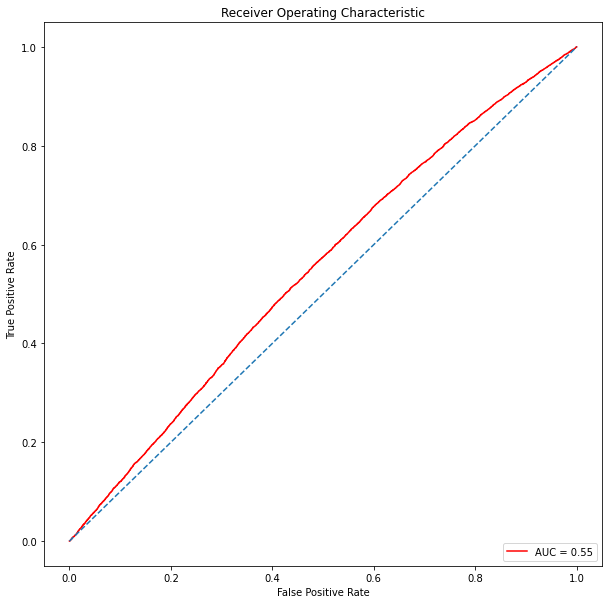

In [ ]:
# ROC Curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### **6. Naive Bayes Classification Model**

In [7]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
print("Score: ", clf.score(X_test,y_test))

Score:  0.6133445002791736


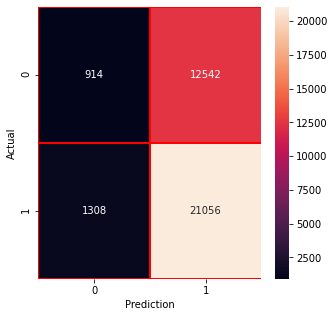

In [8]:
# Confusion Matrix
y_predict = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [9]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.41      0.07      0.12     13456
           1       0.63      0.94      0.75     22364

    accuracy                           0.61     35820
   macro avg       0.52      0.50      0.43     35820
weighted avg       0.55      0.61      0.51     35820



In [10]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
clf_eval = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
clf_eval.mean()

0.6162758235622556

In [12]:
# ROC and AUC
y_prob = clf.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
clf.score(X_test, y_pred)

1.0

In [13]:
# AUC Score
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.5047191176536266

In [14]:
# ROC Score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5264156562079237

Text(0.5, 0, 'False Positive Rate')

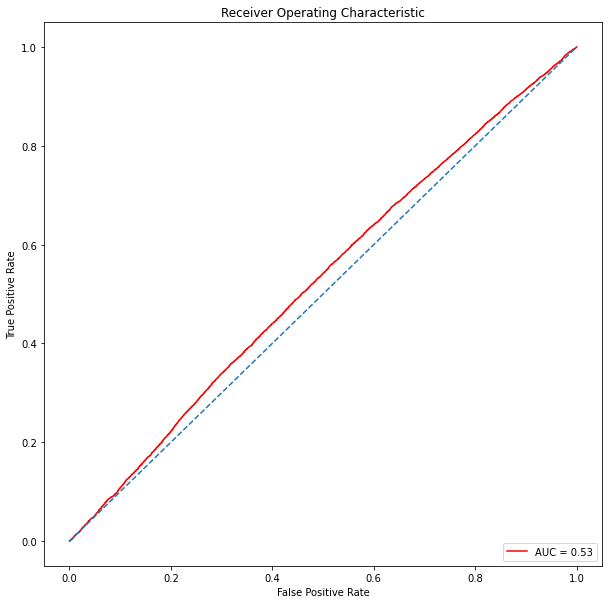

In [15]:
# ROC Curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### **MLP**

In [33]:
from keras.models import Sequential
from keras.layers import Dense

In [34]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='swish'))
#model.add(Dense(10,  activation='swish'))
model.add(Dense(8,  activation='swish'))
model.add(Dense(1,  activation='sigmoid'))

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
h=model.fit(X_train, y_train, epochs=150, batch_size=8)

Epoch 1/150
17910/17910 [==============================] - 20s 1ms/step - loss: 0.6592 - accuracy: 0.6275
Epoch 2/150
17910/17910 [==============================] - 20s 1ms/step - loss: 0.6580 - accuracy: 0.6258
Epoch 3/150
17910/17910 [==============================] - 20s 1ms/step - loss: 0.6568 - accuracy: 0.6276
Epoch 4/150
17910/17910 [==============================] - 19s 1ms/step - loss: 0.6567 - accuracy: 0.6275
Epoch 5/150
17910/17910 [==============================] - 19s 1ms/step - loss: 0.6569 - accuracy: 0.6260
Epoch 6/150
17910/17910 [==============================] - 19s 1ms/step - loss: 0.6559 - accuracy: 0.6272
Epoch 7/150
17910/17910 [==============================] - 19s 1ms/step - loss: 0.6558 - accuracy: 0.6264
Epoch 8/150
17910/17910 [==============================] - 19s 1ms/step - loss: 0.6554 - accuracy: 0.6267
Epoch 9/150
17910/17910 [==============================] - 19s 1ms/step - loss: 0.6555 - accuracy: 0.6260
Epoch 10/150
17910/17910 [====================

In [36]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

1120/1120 [==============================] - 1s 973us/step - loss: 0.6548 - accuracy: 0.6257
Accuracy: 62.57


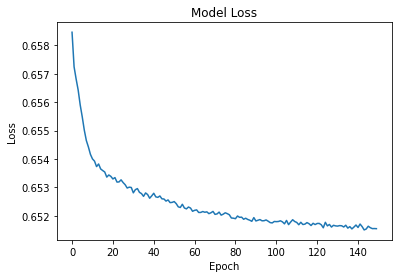

In [37]:
plt.plot(h.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()